
# Business Cases with Data Science 

## Case 3: Prediction of Bookings Cancellation

#### Semester: Spring 2020
#### Group (Palm & Company) Member:
1. Pedro Santos (M20190420)
2. Ana Claudia Alferes (M20190932)
3. Lennart Dangers (M20190251)
4. Michael Machatschek (M20190054)

#### This project follows the CRISP-DM Process:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

This jupypter-notebook provides the code in python to do a customer segmentation of a given dataset. A more detailed description of this project and the solutions can be found in the report. 

# Step 1: Business Understanding

Please consult our report for further details. 

# Step 2: Data Understanding

## Dataset Description

A data dictionary is available in the appendix of our report.
 
 
 
 #### The following code will help to explore and understand the entire dataset. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [7]:
df.columns.values

array(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType',
       'AssignedRoomType', 'BookingChanges', 'DepositType', 'Agent',
       'Company', 'DaysInWaitingList', 'CustomerType', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ReservationStatus', 'ReservationStatusDate'], dtype=object)

In [27]:
non_numerical_var = ["Agent", "ArrivalDateMonth",
                    "ArrivalDateWeekNumber", "ArrivalDateDayOfMonth","ArrivalDateYear","AssignedRoomType",
                     "Company", "Country", "CustomerType","DepositType",
                     "DistributionChannel", "IsCanceled", "IsRepeatedGuest", "MarketSegment",
                     "Meal", "RequiredCarParkingSpaces", "ReservationStatus",
                     "ReservationStatusDate", "ReservedRoomType"]
numerical_var = list(set(df.columns.values) - set(non_numerical_var))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
IsCanceled                     79330 non-null int64
LeadTime                       79330 non-null int64
ArrivalDateYear                79330 non-null int64
ArrivalDateMonth               79330 non-null object
ArrivalDateWeekNumber          79330 non-null int64
ArrivalDateDayOfMonth          79330 non-null int64
StaysInWeekendNights           79330 non-null int64
StaysInWeekNights              79330 non-null int64
Adults                         79330 non-null int64
Children                       79326 non-null float64
Babies                         79330 non-null int64
Meal                           79330 non-null object
Country                        79306 non-null object
MarketSegment                  79330 non-null object
DistributionChannel            79330 non-null object
IsRepeatedGuest                79330 non-null int64
PreviousCancellations          79330 non-null int64


In [14]:
df.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [28]:
for col in non_numerical_var:
    print("--------------------" + col + "--------------------")
    print(df[col].value_counts())
    print("\n")

--------------------Agent--------------------
          9    31955
       NULL     8131
          1     7137
         14     3640
          7     3539
               ...  
        117        1
        453        1
        427        1
        388        1
        408        1
Name: Agent, Length: 224, dtype: int64


--------------------ArrivalDateMonth--------------------
August       8983
May          8232
July         8088
June         7894
October      7605
April        7480
September    7400
March        6458
February     4965
November     4357
December     4132
January      3736
Name: ArrivalDateMonth, dtype: int64


--------------------ArrivalDateWeekNumber--------------------
33    2383
42    2032
20    2016
30    2011
32    1991
17    1965
25    1959
34    1950
21    1948
18    1914
38    1887
23    1869
28    1865
27    1854
41    1842
39    1833
24    1823
15    1783
29    1726
40    1722
22    1697
26    1670
16    1650
35    1642
19    1640
31    1640
13    1605
37    1596


C:\Users\Michael\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Michael\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Michael\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Michael\Anaconda3\lib\site-packages\pandas\plottin

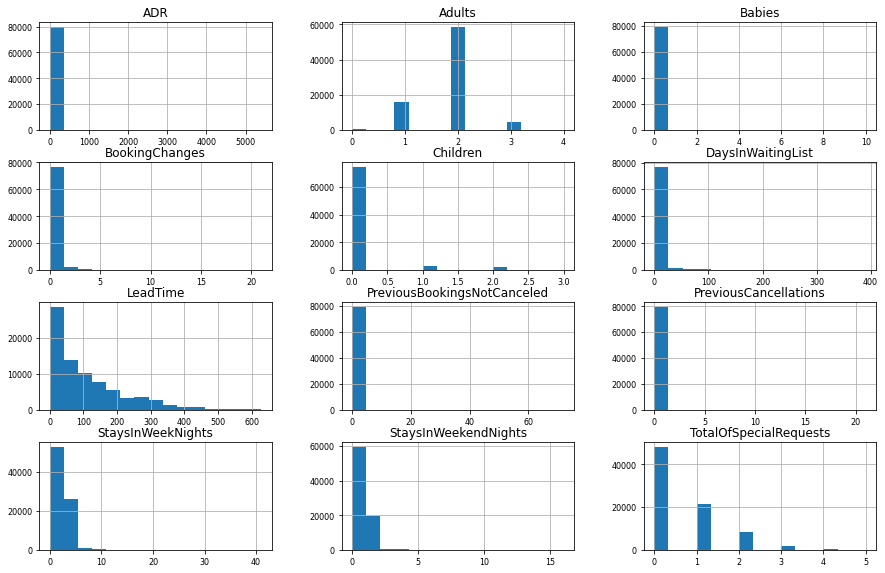

In [16]:
# Do histograms on all numeric variables
df[numerical_var].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

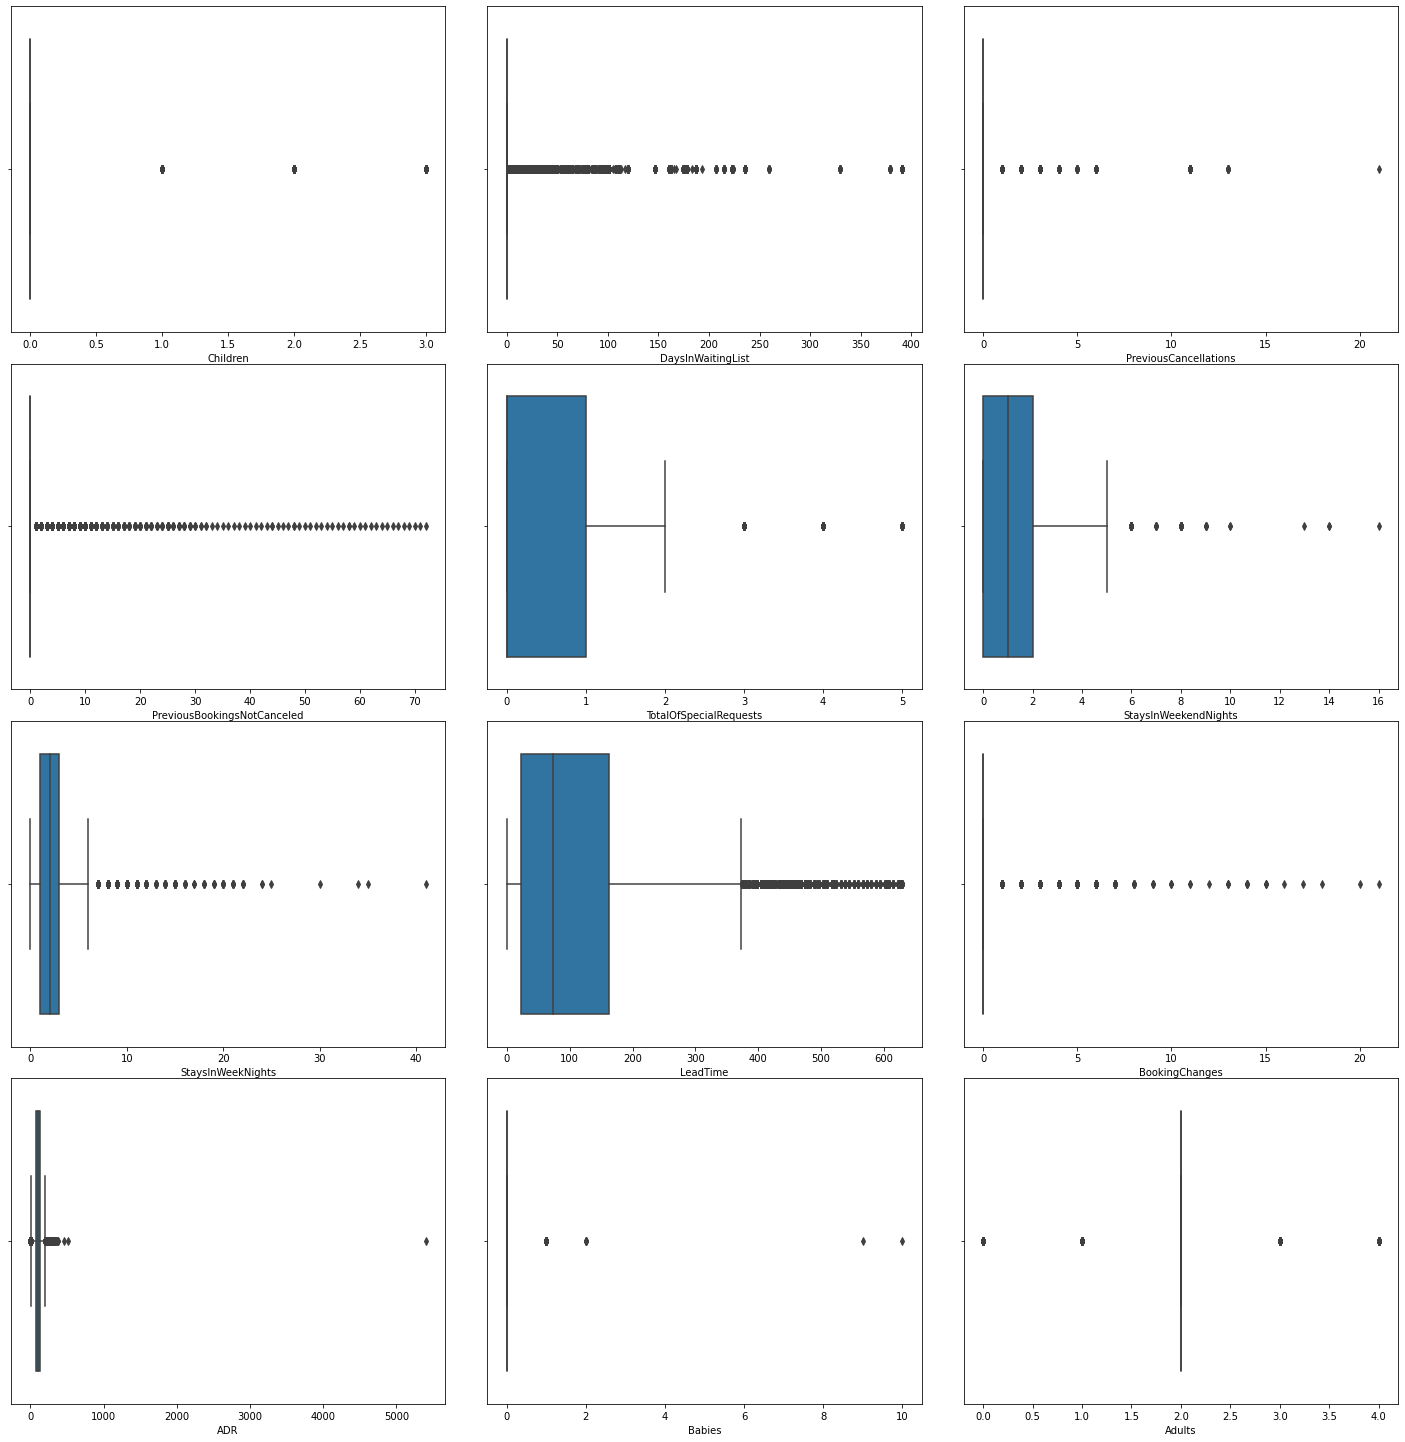

In [18]:
#boxplots to detect outliers
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical_var], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

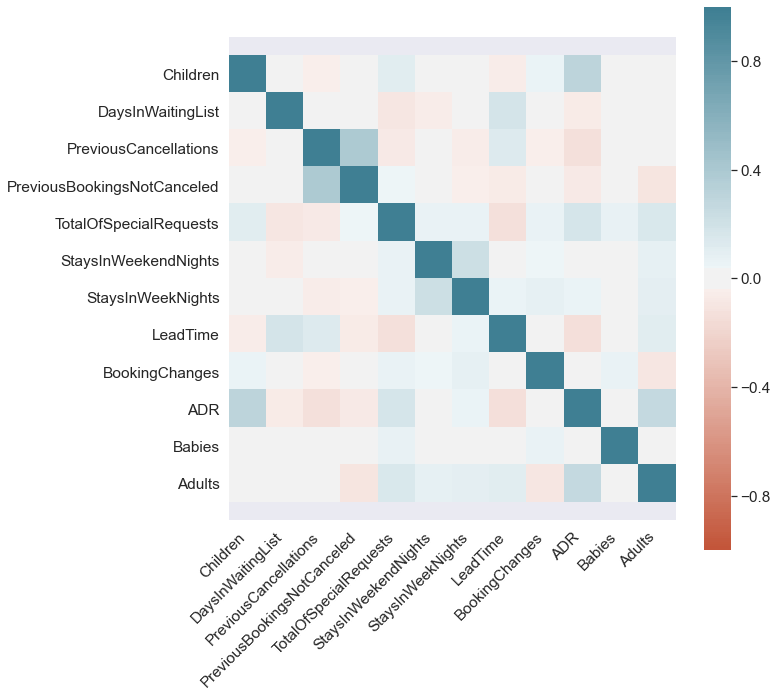

In [19]:
corr = df[numerical_var].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Summary Data Understanding / Data Exploration


# Step 3: Data Preparation

In [13]:
X = df.copy(deep= True)

In [14]:
# Outlier handling

# Step 4: Modeling

# Step 5: Evaluation
